<a href="https://colab.research.google.com/github/cicada3298/AI_project/blob/main/Yet_another_copy_of_Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [1]:
!pip install -U "tensorflow==2.15.*"
!pip install -U "tensorflow-text==2.15.*"
!pip install --upgrade gensim
!pip install --upgrade tensorflow-hub


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 911.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 15.4 MB/s eta 0:00:00


In [2]:

import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow_hub as hub
import tensorflow as tf
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
import tensorflow_text as text
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

In [3]:
# to unzip the csv file
#!unzip /content/news_articles.csv.zip

In [4]:
#data = pd.read_csv('/content/news_articles.csv')
data_fake = pd.read_csv('Fake.csv')
data_true = pd.read_csv('True.csv')

In [5]:
data_true['label'] = 0
data_fake['label'] = 1

In [6]:
data_fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [7]:
data_true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [8]:
data_true.shape, data_fake.shape

((21417, 5), (23481, 5))

In [9]:
data_merge = pd.concat([data_fake, data_true], axis = 0)
data_merge.tail(10)

,title,text,subject,date,label
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",0
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",0
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",0
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",0
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",0
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0


In [10]:
data = data_merge.drop(['title', 'subject', 'date'], axis = 1)

In [11]:
data.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


In [12]:
data = data.sample(frac=0.5)

In [13]:
data.head()

,text,label
13122,,1
6357,A meteorologist wearing a rather classy dress ...,1
4066,If you needed more proof that Donald Trump is ...,1
10578,CHICAGO (Reuters) - An Illinois voter’s lawsui...,0
8464,WASHINGTON (Reuters) - A senior official with ...,0


In [14]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [15]:
data.tail()

,text,label
22444,The U.S. is the great enemy of mankind! rave...,1
22445,ROME (Reuters) - Pope Francis implicitly criti...,0
22446,WASHINGTON (Reuters) - In Friday’s speech layi...,0
22447,A Texas federal judge appointed by Obama has a...,1
22448,Eric Holder in a dress Eric Holder got the bal...,1


In [16]:
data['label'].value_counts()

label
1    11729
0    10720
Name: count, dtype: int64

In [17]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [18]:
data.tail()

,text,label
22444,The U.S. is the great enemy of mankind! rave...,1
22445,ROME (Reuters) - Pope Francis implicitly criti...,0
22446,WASHINGTON (Reuters) - In Friday’s speech layi...,0
22447,A Texas federal judge appointed by Obama has a...,1
22448,Eric Holder in a dress Eric Holder got the bal...,1


In [19]:
data['label'].value_counts()

label
1    11729
0    10720
Name: count, dtype: int64

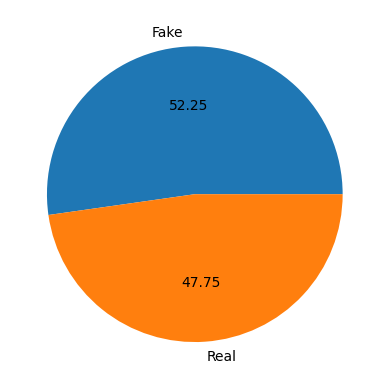

In [20]:
import matplotlib.pyplot as plt
plt.pie(data['label'].value_counts(), labels=['Fake','Real'],autopct="%0.2f")
plt.show()

In [21]:
data['num_characters'] = data['text'].apply(len)
data.head()

,text,label,num_characters
0,,1,1
1,A meteorologist wearing a rather classy dress ...,1,2564
2,If you needed more proof that Donald Trump is ...,1,2878
3,CHICAGO (Reuters) - An Illinois voter’s lawsui...,0,3428
4,WASHINGTON (Reuters) - A senior official with ...,0,2194


Mean Length 2468.21911889171
Min Length 1
Max Length 51794


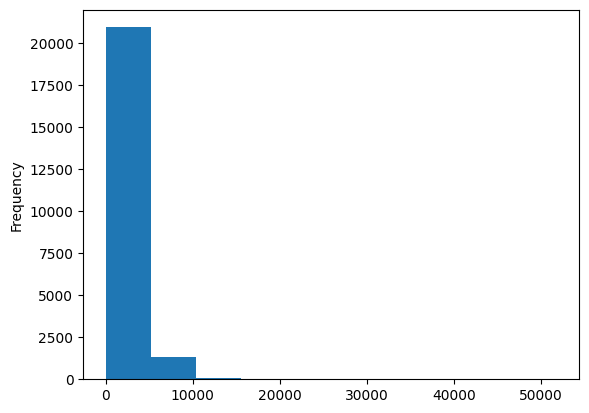

In [22]:
# Character Length of Titles - Min, Mean, Max
print('Mean Length', data['text'].apply(len).mean())
print('Min Length', data['text'].apply(len).min())
print('Max Length', data['text'].apply(len).max())

x = data['text'].apply(len).plot.hist()

We see that that the numbers of characters in each entry ranges from 2–443. There is a high concentration of samples with a length of 0–100. This can be further seen with the mean length in the dataset being approximately 61.

In [23]:
#Import nltk preprocessing library to convert text into a readable format
import string
import nltk
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

#Tokenize the string (create a list -> each index is a word)
data['title_words'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

#Define text lemmatization model (eg: walks will be changed to walk)
lemmatizer = WordNetLemmatizer()

#Loop through title dataframe and lemmatize each word
def lemma(data):
  return [lemmatizer.lemmatize(w) for w in data]

#Apply to dataframe
data['title_lemma'] = data['title_words'].apply(lemma)

#Define all stopwords in the English language (it, was, for, etc.)
stop = stopwords.words('english')

#Remove them from our dataframe
data['title_stop'] = data['title_lemma'].apply(lambda x: [i for i in x if i not in stop])
data['text_processed'] = data['title_stop'].apply(lambda x: [i for i in x if i not in string.punctuation])
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,label,num_characters,title_words,title_lemma,title_stop,text_processed
0,,1,1,[],[],[],[]
1,A meteorologist wearing a rather classy dress ...,1,2564,"[A, meteorologist, wearing, a, rather, classy,...","[A, meteorologist, wearing, a, rather, classy,...","[A, meteorologist, wearing, rather, classy, dr...","[A, meteorologist, wearing, rather, classy, dr..."
2,If you needed more proof that Donald Trump is ...,1,2878,"[If, you, needed, more, proof, that, Donald, T...","[If, you, needed, more, proof, that, Donald, T...","[If, needed, proof, Donald, Trump, toxic, hate...","[If, needed, proof, Donald, Trump, toxic, hate..."
3,CHICAGO (Reuters) - An Illinois voter’s lawsui...,0,3428,"[CHICAGO, (, Reuters, ), -, An, Illinois, vote...","[CHICAGO, (, Reuters, ), -, An, Illinois, vote...","[CHICAGO, (, Reuters, ), -, An, Illinois, vote...","[CHICAGO, Reuters, An, Illinois, voter, ’, law..."
4,WASHINGTON (Reuters) - A senior official with ...,0,2194,"[WASHINGTON, (, Reuters, ), -, A, senior, offi...","[WASHINGTON, (, Reuters, ), -, A, senior, offi...","[WASHINGTON, (, Reuters, ), -, A, senior, offi...","[WASHINGTON, Reuters, A, senior, official, Rep..."


In [24]:
data.drop(columns=['title_words','title_lemma','title_stop'], inplace=True)

In [25]:
data['text_processed'] = data['text_processed'].apply(lambda x: " ".join(x))

In [26]:
data.head()

,text,label,num_characters,text_processed
0,,1,1,
1,A meteorologist wearing a rather classy dress ...,1,2564,A meteorologist wearing rather classy dress wa...
2,If you needed more proof that Donald Trump is ...,1,2878,If needed proof Donald Trump toxic hateful bul...
3,CHICAGO (Reuters) - An Illinois voter’s lawsui...,0,3428,CHICAGO Reuters An Illinois voter ’ lawsuit ch...
4,WASHINGTON (Reuters) - A senior official with ...,0,2194,WASHINGTON Reuters A senior official Republica...


In [27]:
data.drop(['text', 'num_characters'], axis = 1, inplace = True)

In [28]:
data.tail()

,label,text_processed
22444,1,The U.S. great enemy mankind raved Ernesto Che...
22445,0,ROME Reuters Pope Francis implicitly criticize...
22446,0,WASHINGTON Reuters In Friday ’ speech laying s...
22447,1,A Texas federal judge appointed Obama ha rejec...
22448,1,Eric Holder dress Eric Holder got ball rolling...


In [29]:
real_words = []
for lst in data[data['label'] == 0]['text_processed'].tolist():
  for word in lst.split():
    real_words.append(word)

In [30]:
len(real_words)

2720148

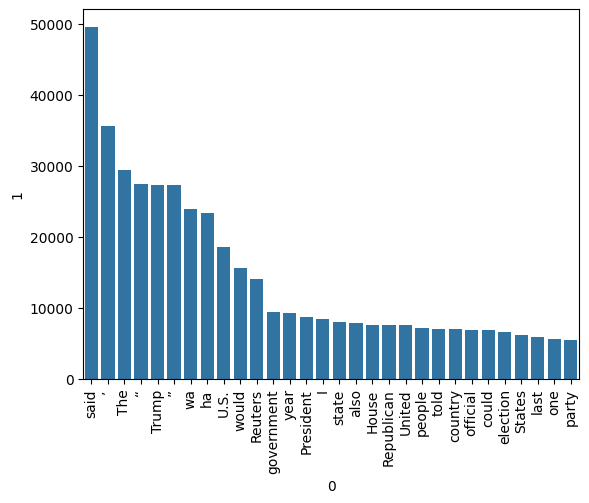

In [31]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(real_words).most_common(30))[0],y=pd.DataFrame(Counter(real_words).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [32]:
fake_words = []
for lst in data[data['label'] == 1.0]['text_processed'].tolist():
  for word in lst.split():
    fake_words.append(word)

In [33]:
len(fake_words)

2985319

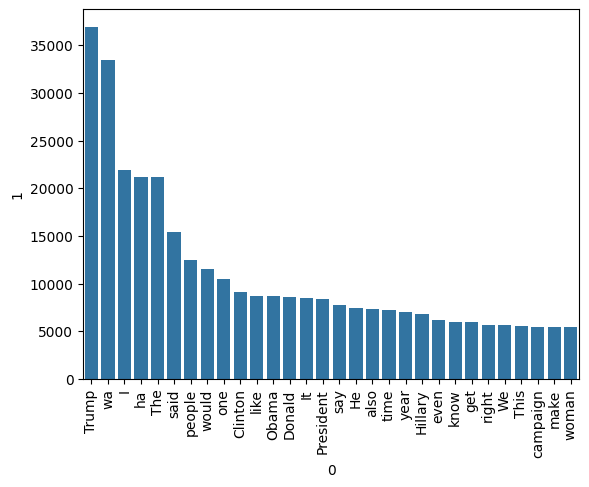

In [34]:
sns.barplot(x=pd.DataFrame(Counter(fake_words).most_common(30))[0],y=pd.DataFrame(Counter(fake_words).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [35]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=2000)

In [36]:
X = tfidf.fit_transform(data['text_processed']).toarray()

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [38]:
X.shape

(22449, 2000)

In [39]:
y = data['label'].values

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [42]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [43]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [44]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9621380846325167
[[2077   85]
 [  85 2243]]
0.9634879725085911


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [46]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [47]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [48]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [49]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)


    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.996437,0.997418
4,LR,0.994209,0.996978
9,GBDT,0.993318,0.996972
7,BgC,0.994878,0.995699
6,AdaBoost,0.994432,0.995269
10,xgb,0.995323,0.994852
3,DT,0.991314,0.994812
8,ETC,0.987751,0.994345
0,SVC,0.948775,0.942990
2,NB,0.935412,0.941508


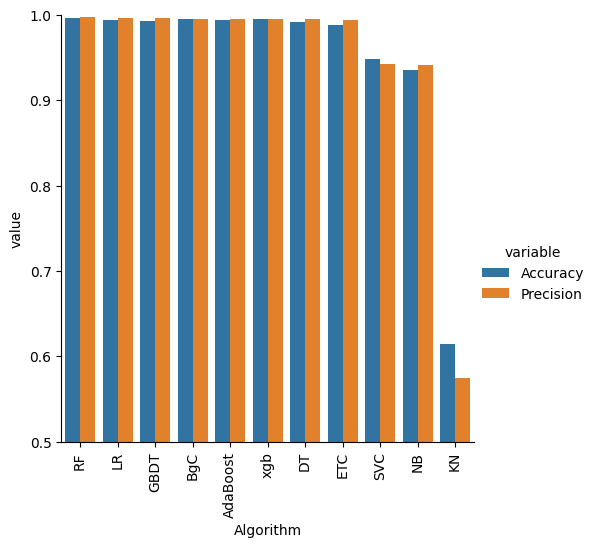

In [50]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [51]:
# Voting Classifier
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
dt = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [52]:
voting = VotingClassifier(estimators=[('gbdt', gbdt), ('dt', dt), ('rf', rfc)],voting='soft')

In [53]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('gbdt',
                              GradientBoostingClassifier(n_estimators=50,
                                                         random_state=2)),
                             ('dt', DecisionTreeClassifier(max_depth=5)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [54]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9930957683741648
Precision 0.9961123110151188


In [60]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))